In [1]:
import importlib
import sys

import sklearn.linear_model

sys.path.insert(0, './..')
from utils import data_manage_utils, train_utils
importlib.reload(data_manage_utils)
importlib.reload(train_utils)

<module 'utils.train_utils' from 'C:\\Users\\chrig\\OneDrive - Johannes Kepler Universität Linz (1)\\Masterarbeit\\PythonWorkspace\\training\\./..\\utils\\train_utils.py'>

In [2]:
import pandas as pd

data = pd.read_pickle("processed_files/01a_preprocessing.pkl")
X_train = pd.read_pickle("processed_files/NEW/X_train_df.pkl")
cols = list(X_train.columns) + list(data.columns[-1:])
data = data[cols]
X = data[cols[:-1]]
y = data[cols[-1:]]
print(f"Shape of y: {y.shape}")
X

Shape of y: (348872, 1)


,ARR_MIN_OF_DAY_COS,WINGLETS(YN),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),MTOW(KG),TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),SEA_LEVEL_PRESSURE(MILLIBAR),...,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
5612585,0.446798,1,410.0,0,78000.133912,5.611111,95.84,140.0,11.112,1018.8,...,0,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.894635
5614966,0.305184,0,448.0,2,79015.726400,5.611111,95.84,140.0,11.112,1018.8,...,0,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.952293
5616651,0.116537,0,421.0,2,79015.726400,6.111111,96.24,170.0,18.520,1017.8,...,0,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.993186
5616326,0.100522,0,450.0,2,122469.840000,6.111111,96.24,170.0,18.520,1017.8,...,0,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.994935
5613460,0.040266,0,458.0,2,79015.726400,6.111111,96.24,170.0,18.520,1017.8,...,0,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.999189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,0.838671,1,122.0,8,78000.133912,6.722222,57.37,320.0,12.964,1019.5,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.544639
11283412,0.855781,0,290.0,8,79015.726400,6.722222,57.37,320.0,12.964,1019.5,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.517338
11284363,0.855781,0,170.0,8,79015.726400,6.722222,57.37,320.0,12.964,1019.5,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.517338
11286614,0.864005,1,179.0,11,78000.133912,6.722222,57.37,320.0,12.964,1019.5,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.503484


In [3]:
import numpy as np

conditions = [(y["ARR_DELAY_MINS"] < -15),
              (y["ARR_DELAY_MINS"] >= -15) & (y["ARR_DELAY_MINS"] <= 15),
              (y["ARR_DELAY_MINS"] > 15)]
cats = [0,1,2]
y["old_cats"] = np.select(conditions, cats)
y

C:\Users\chrig\AppData\Local\Temp\ipykernel_12184\3331983517.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["old_cats"] = np.select(conditions, cats)


,ARR_DELAY_MINS,old_cats
5612585,-10,1
5614966,-8,1
5616651,-20,0
5616326,-7,1
5613460,-6,1
...,...,...
11289608,-10,1
11283412,17,2
11284363,5,1
11286614,30,2


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(X)
pca_reduced_data = PCA(n_components=2).fit_transform(X_scaled)

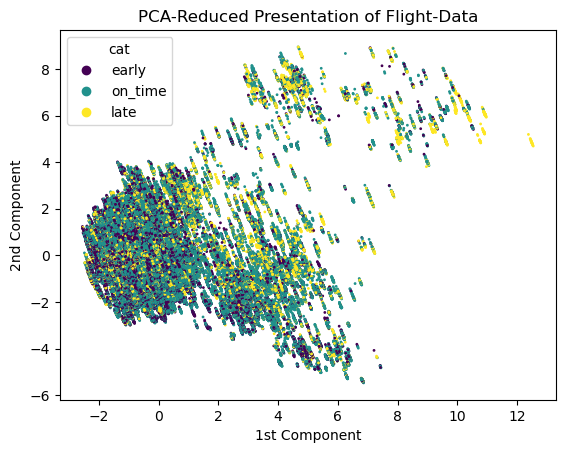

In [5]:
import matplotlib.pyplot as plt
scatter = plt.scatter(pca_reduced_data[:, 0], pca_reduced_data[:, 1], c=y["old_cats"], s = 1)
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.title("PCA-Reduced Presentation of Flight-Data")
labels = ["early", "on_time", "late"]
plt.legend(handles=scatter.legend_elements()[0], title="cat", labels=labels)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

_y = y["ARR_DELAY_MINS"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,_y, test_size=0.33, random_state=42)
print(f"Shape of X_train:{X_train.shape}\nShape of y_train:{y_train.shape}\nShape of X_test:{X_test.shape}\nShape of y_test:{y_test.shape}")

Shape of X_train:(233744, 26)
Shape of y_train:(233744,)
Shape of X_test:(115128, 26)
Shape of y_test:(115128,)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.22212333, -0.60917435, -0.56202256, ..., -1.18346024,
         0.86755659,  1.36823808],
       [ 1.76094722,  1.64156617, -0.60324053, ..., -0.68207074,
        -1.25291248, -1.01603737],
       [-0.62270821, -0.60917435, -0.56202256, ...,  1.06976372,
         0.86755659,  1.13273261],
       ...,
       [-0.77841607, -0.60917435, -0.65476298, ...,  1.3480139 ,
        -0.30921496, -0.54051272],
       [-1.03030426, -0.60917435, -0.07771148, ...,  0.56837422,
        -1.25291248, -0.19477361],
       [ 0.46905834, -0.60917435,  0.26233673, ..., -1.18346024,
         0.86755659, -1.10901547]])

In [8]:
train_median = np.median(y_train)
train_mean = np.mean(y_train)
print(f"Training median: {train_median}\nTraining mean: {train_mean}")
y_pred_mean = np.full(y_test.shape, train_mean)
y_pred_median = np.full(y_test.shape, train_median)

Training median: -8.0
Training mean: 2.2420468546786227


In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_linreg = lin_reg.predict(X_test_scaled)

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVR

grid = {'C': [1, 5, 10, 50, 100],
        'kernel': ["rbf"]
        }
svr = SVR()
kf = KFold(n_splits=3)
grid_search = GridSearchCV(svr, param_grid=grid, n_jobs=3,
                           verbose=10, cv=kf, scoring="neg_mean_absolute_error", return_train_score=True)
start, start_string = data_manage_utils.print_time()
print("Start time: " + start_string)
grid_search.fit(X_train, y_train)
end, end_string = data_manage_utils.print_time()
print("End time: " + end_string)
print("Time elapsed: " + str(end - start))

best_params = grid_search.best_params_
print("Best params: " + str(best_params))

svr = SVR(**best_params)
svr.fit(X_train_scaled, y_train)
y_pred_svr_rbf = svr.predict(X_test_scaled)

Start time: 2023_02_22 01:00
Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def print_score(y_true, y_pred, label):
    print("="*10 + label + "="*10)
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.8f}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.8f}")
    print(f"R2-Score: {r2_score(y_true, y_pred):.8f}")

print_score(y_test, y_pred_mean, "MEAN BASELINE")
print_score(y_test, y_pred_median, "MEDIAN BASELINE")
print_score(y_test, y_pred_linreg, "LINEAR REGRESSION")
print_score(y_test, y_pred_svr_rbf, "SUPPORT VECTOR REGRESSION (RBF)")